In [ ]:
%matplotlib inline
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 86kB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path
from __future__ import print_function
from ipywidgets import interact, FloatSlider
!cp /content/gdrive/MyDrive/myshow.py .
from myshow import myshow, myshow3d

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
lul = '/content/gdrive/MyDrive/generated/train/nifti/ProstateX-0004/t2/5_t2_tse_tra.nii.gz'
image = sitk.ReadImage(lul)
img_255 = sitk.Cast(sitk.RescaleIntensity(image), sitk.sitkUInt8)
myshow3d(img_255)

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

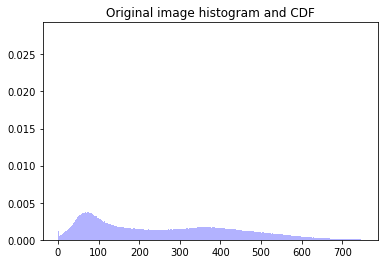

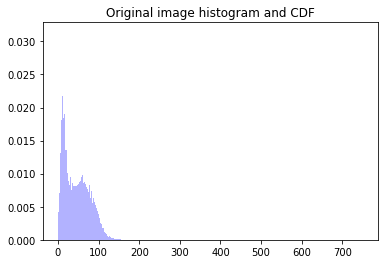

In [ ]:
# let's compare their histograms : 
image_array = sitk.GetArrayFromImage(image)
pixels = image_array.flatten()
plt.hist(pixels, bins = 749, range = (0, 749), density = True, color = 'blue', alpha = 0.3)
plt.title('Original image histogram and CDF')
plt.show()

image_array = sitk.GetArrayFromImage(img_255)
pixels = image_array.flatten()
plt.hist(pixels, bins = 749, range = (0, 749), density = True, color = 'blue', alpha = 0.3)
plt.title('Original image histogram and CDF')
plt.show()

In [ ]:
# Thresholding 
seg = img_255>0
myshow(sitk.LabelOverlay(img_255, seg), "Basic Thresholding")

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

In [ ]:
seg = sitk.BinaryThreshold(image, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0)
myshow(sitk.LabelOverlay(img_255, seg), "Binary Thresholding")

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

In [ ]:
seed = (100,100,8)
seg = sitk.Image(image.GetSize(), sitk.sitkUInt8)
seg.GetSize()
seg.CopyInformation(image)
seg[seed] = 1

vectorRadius=(1,1,1)
kernel=sitk.sitkBall
seg_implicit_thresholds_clean = sitk.BinaryMorphologicalClosing(seg, 
                                                                vectorRadius,
                                                                kernel)

seg = sitk.BinaryDilate(seg)
myshow(sitk.LabelOverlay(img_255, seg), "Initial Seed")
myshow(sitk.LabelOverlay(img_255, seg_implicit_thresholds_clean), "Binary Closing Seed")

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

In [ ]:
seg = sitk.ConnectedThreshold(image, seedList=[seed], lower=100, upper=190)
myshow(sitk.LabelOverlay(img_255, seg), "Connected Threshold")

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

In [ ]:
seg = sitk.ConfidenceConnected(image, seedList=[seed],
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)

myshow(sitk.LabelOverlay(img_255, seg), "ConfidenceConnected")

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

In [ ]:
myshow(image)

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…